In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
                    ############### Planck data: ###############
with open("fisher_data/planck_n=0/planck_sigma_dmeff_n=0.txt") as f:
    data = f.read()
    data = data.split('\n')
    y0 = [float(row.split(' ')[1]) for row in data]
    x0 = [float(row.split(' ')[0]) for row in data]
    step0 = [float(row.split(' ')[2]) for row in data]
    
with open("fisher_data/planck_n=2/planck_sigma_dmeff_n=2.txt") as f2:
    data2 = f2.read()
    data2 = data2.split('\n')
    y2 = [float(row.split(' ')[1]) for row in data2]
    x2 = [float(row.split(' ')[0]) for row in data2]
    step2 = [float(row.split(' ')[2]) for row in data2]

In [8]:
                    ############### S4 MCMC data: ############### 
with open("MCMC_data/S4_Aizhan_n=0.txt") as a0:
    dat0 = a0.read()
    dat0 = dat0.split('\n')
    masses_n0 = [float(row.split(' ')[1]) for row in dat0]
    sigma_dmeff_95_S4_n0 = [float(row.split(' ')[0]) for row in dat0]
with open("MCMC_data/S4_Aizhan_n=2.txt") as a2:
    dat2 = a2.read()
    dat2 = dat2.split('\n')
    masses_n2 = [float(row.split(' ')[1]) for row in dat2]
    sigma_dmeff_95_S4_n2 = [float(row.split(' ')[0]) for row in dat2] 
with open("MCMC_data/S4_Aizhan_n=4.txt") as a4:
    dat4 = a4.read()
    dat4 = dat4.split('\n')
    masses_n4 = [float(row.split(' ')[1]) for row in dat4]
    sigma_dmeff_95_S4_n4 = [float(row.split(' ')[0]) for row in dat4]
with open("MCMC_data/S4_Aizhan_n=6.txt") as a6:
    dat6 = a6.read()
    dat6 = dat6.split('\n')
    masses_n6 = [float(row.split(' ')[1]) for row in dat6]
    sigma_dmeff_95_S4_n6 = [float(row.split(' ')[0]) for row in dat6]

# from Li et al
zack_li_sigma_n0 = 0.6e-26
zack_li_m_n0 = 1.0

In [9]:
                    ############### S4 Fisher data: ############### 
with open("fisher_data/S4_n=2/Isabella_n=2.txt") as an2:
    data_n2 = an2.read()
    data_n2 = data_n2.split('\n')
    m_n2 = [float(row.split(' ')[1]) for row in data_n2]
    sigma_n2 = [float(row.split(' ')[0]) for row in data_n2]

with open("fisher_data/S4_n=0/Isabella_n=0.txt") as a2:
    data_n0 = a2.read()
    data_n0 = data_n0.split('\n')
    m_n0 = [float(row.split(' ')[1]) for row in data_n0]
    sigma_n0 = [float(row.split(' ')[0]) for row in data_n0]
    
with open("fisher_data/S4_n=4/Isabella_n=4.txt") as a4:
    data_n4 = a4.read()
    data_n4 = data_n4.split('\n')
    m_n4 = [float(row.split(' ')[1]) for row in data_n4]
    sigma_n4 = [float(row.split(' ')[0]) for row in data_n4]

residual n=0 = 
[0.33236003584248147, 0.7194919710708538, 1.3808775098957013, 3.068013653004583, 4.497202679908267]
residual n=2 = 
[0.5212410986142658, 5.226270004353127, 4.095119302762002, 379.4198457539674]


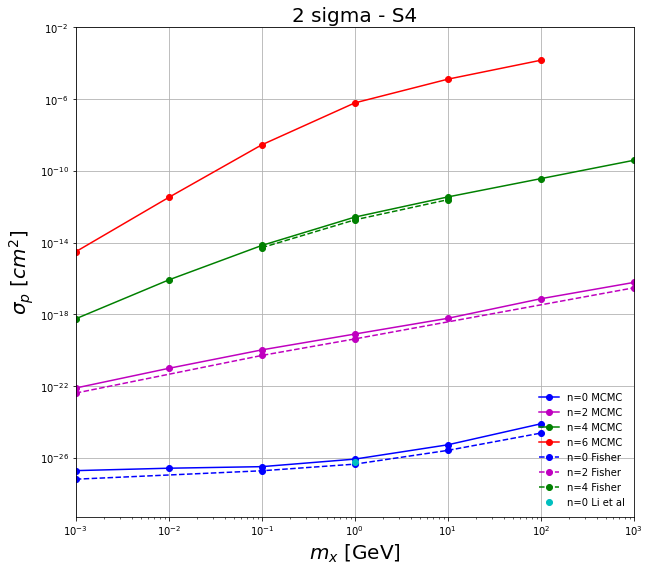

In [17]:
#residual 
residual_n0 = [i/j for i, j in zip(sigma_n0, sigma_dmeff_95_S4_n0)]
print("residual n=0 = "), print(residual_n0) 

residual_n2 = [i/j for i, j in zip(sigma_n2, sigma_dmeff_95_S4_n2)]
print("residual n=2 = "), print(residual_n2) 

                ############## S4 PLOT: ##############
fig, ax = plt.subplots(figsize=(10, 9))


ax.plot(masses_n0, sigma_dmeff_95_S4_n0, 'bo-',label='n=0 MCMC')
ax.plot(masses_n2, sigma_dmeff_95_S4_n2, 'mo-',label='n=2 MCMC')
ax.plot(masses_n4, sigma_dmeff_95_S4_n4, 'go-',label='n=4 MCMC')
ax.plot(masses_n6, sigma_dmeff_95_S4_n6, 'ro-',label='n=6 MCMC')
ax.plot(m_n0, sigma_n0, 'bo--',label='n=0 Fisher')
ax.plot(m_n2, sigma_n2,'mo--', label='n=2 Fisher')
ax.plot(m_n4, sigma_n4,'go--', label='n=4 Fisher')

ax.plot(zack_li_m_n0, zack_li_sigma_n0,'co', label='n=0 Li et al')

#ax.plot(masses_n0, residual_n0, '--',label='n=0 residual')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()

plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel(r"$\sigma_p$ [$cm^2$]",fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 1e-2))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection_S4.png")
plt.title('2 sigma - S4',fontsize=20)
plt.show()

In [12]:
#n=4
m4 = [1e-3, 1, 1e3]
step4 = [1, 7e-13, 1] 

/anaconda2/envs/idm/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


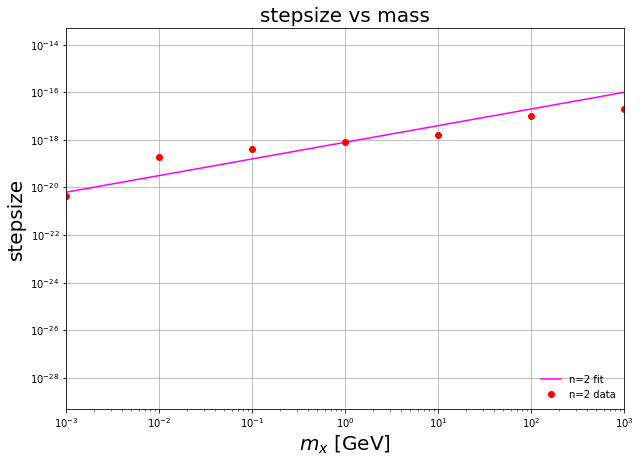

In [13]:
# FITTING LINE FOR STEPSIZE vs MASS
from scipy.optimize import curve_fit
def powlaw(x2, a, b, c):
    return a * np.power(x2, b)
def fun(x):
    return 8e-19 * np.power(x2, 0.70)
#def fun(x):
#    return 7e-13 * np.power(m4, 0.85)

fig, ax = plt.subplots(figsize=(10, 7))
popt, pcov = curve_fit(powlaw, x2, step2)

#print(popt)
#print([i for i in powlaw(step2, *popt)])
#ax.plot(x2, powlaw(step2, *popt), 'b-',label='n=2 fit2')
ax.plot(x2, fun(step2), 'magenta',label='n=2 fit')
ax.plot(x2, step2, 'ro',label='n=2 data')

ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()
plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel('stepsize',fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection.png")
plt.title('stepsize vs mass',fontsize=20)

plt.show()